# Preprocessing and Feature Engineering
## What does this notebook encompass?

This notebook covers all essential pre-processing and feature engineering steps for Machine Learning and Deep Learning models.

## About the data

The data was taken from KAGGLE. The data is for hourly energy consuption for Commonwealth Edison, commonly known by syllabic abbreviation as ComEd, the largest electric utility in Illinois, and the primary electric provider in Chicago and much of Northern Illinois.

Link for the data: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption?select=COMED_hourly.csv

In [6]:
import pandas as pd #Importing Libraries
df = pd.read_csv(r'/home/hashim/Assignments/Sem6/DataMining/DM_Proj/data/COMED_hourly.csv') #Reading the CSV file
df['Datetime'] = pd.to_datetime(df['Datetime']) #Converting the Datetime column to datetime format
df

,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0
...,...,...
66492,2018-01-01 20:00:00,13858.0
66493,2018-01-01 21:00:00,13758.0
66494,2018-01-01 22:00:00,13627.0
66495,2018-01-01 23:00:00,13336.0


In [7]:
df = df.sort_values('Datetime') #Sorting the values based on Datetime
df

,Datetime,COMED_MW
8734,2011-01-01 01:00:00,9631.0
8735,2011-01-01 02:00:00,9273.0
8736,2011-01-01 03:00:00,9011.0
8737,2011-01-01 04:00:00,8741.0
8738,2011-01-01 05:00:00,8694.0
...,...,...
61381,2018-08-02 20:00:00,16437.0
61382,2018-08-02 21:00:00,15590.0
61383,2018-08-02 22:00:00,15086.0
61384,2018-08-02 23:00:00,14448.0


In [8]:
# add a column for season based on month
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['Season'] = df['Datetime'].dt.month.apply(season) #Adding a new column 'Season' based on the month
df

,Datetime,COMED_MW,Season
8734,2011-01-01 01:00:00,9631.0,Winter
8735,2011-01-01 02:00:00,9273.0,Winter
8736,2011-01-01 03:00:00,9011.0,Winter
8737,2011-01-01 04:00:00,8741.0,Winter
8738,2011-01-01 05:00:00,8694.0,Winter
...,...,...,...
61381,2018-08-02 20:00:00,16437.0,Summer
61382,2018-08-02 21:00:00,15590.0,Summer
61383,2018-08-02 22:00:00,15086.0,Summer
61384,2018-08-02 23:00:00,14448.0,Summer


In [9]:
# add a column for time of day, i.e morning, afternoon, evening, night based on hour
def time_of_day(hour):
    if hour in range(6, 12):
        return 'Morning'
    elif hour in range(12, 17):
        return 'Afternoon'
    elif hour in range(17, 22):
        return 'Evening'
    else:
        return 'Night'

df['Time_of_day'] = df['Datetime'].dt.hour.apply(time_of_day) #Adding a new column 'Time_of_day' based on the hour
df

,Datetime,COMED_MW,Season,Time_of_day
8734,2011-01-01 01:00:00,9631.0,Winter,Night
8735,2011-01-01 02:00:00,9273.0,Winter,Night
8736,2011-01-01 03:00:00,9011.0,Winter,Night
8737,2011-01-01 04:00:00,8741.0,Winter,Night
8738,2011-01-01 05:00:00,8694.0,Winter,Night
...,...,...,...,...
61381,2018-08-02 20:00:00,16437.0,Summer,Evening
61382,2018-08-02 21:00:00,15590.0,Summer,Evening
61383,2018-08-02 22:00:00,15086.0,Summer,Night
61384,2018-08-02 23:00:00,14448.0,Summer,Night


In [18]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor

def is_holiday(date):
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start='2011-01-01', end='2018-08-03')
    
    normalized_date = pd.to_datetime(date).normalize()

    # Check if the provided date is a holiday
    if (normalized_date) in holidays:
        return 'Holiday'
    else:
        return 'Not Holiday'

# Create a ProcessPoolExecutor
with ProcessPoolExecutor() as executor:
    tqdm.pandas(desc="Evaluating records")  # Initialize tqdm with pandas
    # Use executor.map to apply the function in parallel
    df['Holiday'] = list(tqdm(executor.map(is_holiday, df['Datetime'].dt.date), total=df.shape[0]))

df

100%|██████████| 66497/66497 [02:06<00:00, 524.14it/s]


,Datetime,COMED_MW,Season,Time_of_day,Holiday
8734,2011-01-01 01:00:00,9631.0,Winter,Night,Not Holiday
8735,2011-01-01 02:00:00,9273.0,Winter,Night,Not Holiday
8736,2011-01-01 03:00:00,9011.0,Winter,Night,Not Holiday
8737,2011-01-01 04:00:00,8741.0,Winter,Night,Not Holiday
8738,2011-01-01 05:00:00,8694.0,Winter,Night,Not Holiday
...,...,...,...,...,...
61381,2018-08-02 20:00:00,16437.0,Summer,Evening,Not Holiday
61382,2018-08-02 21:00:00,15590.0,Summer,Evening,Not Holiday
61383,2018-08-02 22:00:00,15086.0,Summer,Night,Not Holiday
61384,2018-08-02 23:00:00,14448.0,Summer,Night,Not Holiday


In [19]:
df[df['Holiday'] == 'Holiday']

,Datetime,COMED_MW,Season,Time_of_day,Holiday
8397,2011-01-17 00:00:00,11518.0,Winter,Night,Holiday
8350,2011-01-17 01:00:00,11005.0,Winter,Night,Holiday
8351,2011-01-17 02:00:00,10594.0,Winter,Night,Holiday
8352,2011-01-17 03:00:00,10438.0,Winter,Night,Holiday
8353,2011-01-17 04:00:00,10329.0,Winter,Night,Holiday
...,...,...,...,...,...
62076,2018-07-04 19:00:00,17700.0,Summer,Evening,Holiday
62077,2018-07-04 20:00:00,17134.0,Summer,Evening,Holiday
62078,2018-07-04 21:00:00,16365.0,Summer,Evening,Holiday
62079,2018-07-04 22:00:00,15949.0,Summer,Night,Holiday


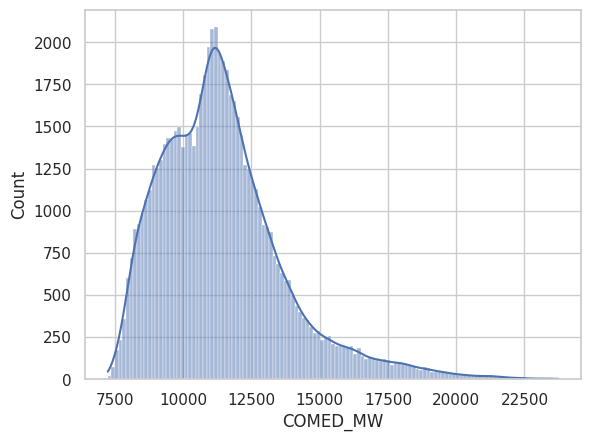

<Figure size 2000x1000 with 0 Axes>

In [25]:
# check if comed_mw has a normal distribution by plotting a histogram
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['COMED_MW'], kde=True)
plt.figure(figsize=(20, 10))
plt.show()

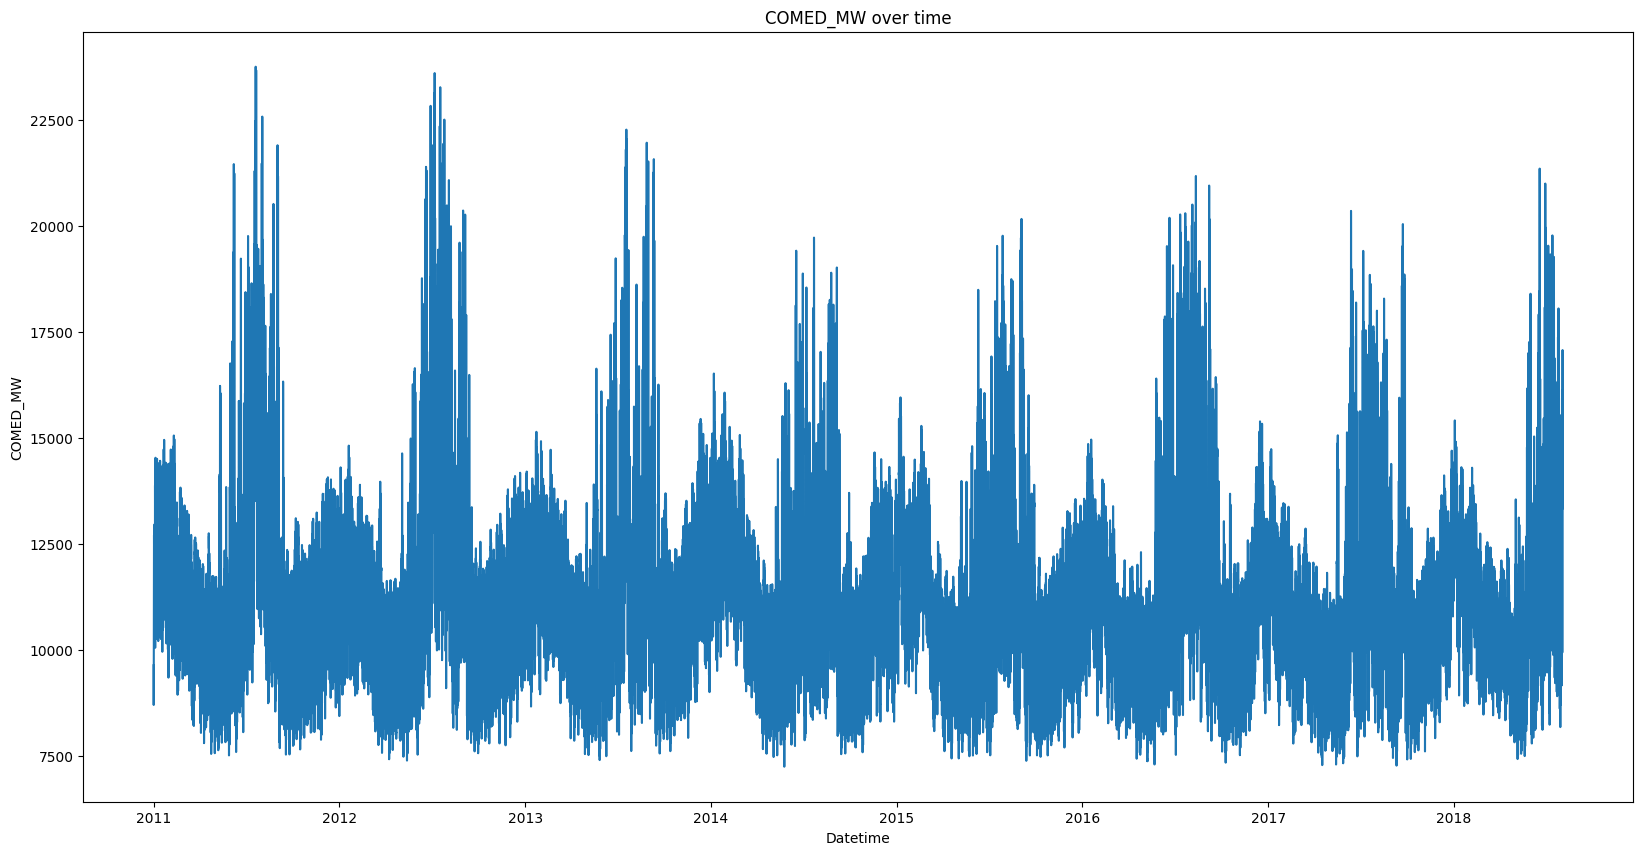

In [22]:
# plot a line graph of comed_mw over time
plt.figure(figsize=(20, 10))
plt.plot(df['Datetime'], df['COMED_MW'])
plt.xlabel('Datetime')
plt.ylabel('COMED_MW')
plt.title('COMED_MW over time')
plt.show()

## Which type of normalization/standerdization should we use?

Typically, we use MinMax scaling, Z-score Normalization or Robust Scaling. 

Usually for Energy Consumption data standardization (Z-score normalization) is typically recommended because it handles the influence of outliers by normalizing the data distribution to have a mean of zero and a standard deviation of one. This can be particularly useful in algorithms that assume or benefit from data that is normally distributed.

### The problem at hand:
However, given the presence of sharp peaks, robust scaling is more appropriate for our dataset. This method will help reduce the influence of the extreme values when training machine learning models, particularly those sensitive to the scale of input features like SVMs or neural networks.

### Research paper that supports our claim:
The research paper: RobustScaler: QoS-Aware Autoscaling for Complex Workloads, further strenghtens our argument of why Robust scaling is the best approach in dealing with data that has consistent peaks. 

Read more here: https://ar5iv.labs.arxiv.org/html/2204.07197

In [26]:
# apply robust scaling to comed_mw
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['COMED_MW_scaled'] = scaler.fit_transform(df[['COMED_MW']])
df

,Datetime,COMED_MW,Season,Time_of_day,Holiday,COMED_MW_scaled
8734,2011-01-01 01:00:00,9631.0,Winter,Night,Not Holiday,-0.557143
8735,2011-01-01 02:00:00,9273.0,Winter,Night,Not Holiday,-0.688278
8736,2011-01-01 03:00:00,9011.0,Winter,Night,Not Holiday,-0.784249
8737,2011-01-01 04:00:00,8741.0,Winter,Night,Not Holiday,-0.883150
8738,2011-01-01 05:00:00,8694.0,Winter,Night,Not Holiday,-0.900366
...,...,...,...,...,...,...
61381,2018-08-02 20:00:00,16437.0,Summer,Evening,Not Holiday,1.935897
61382,2018-08-02 21:00:00,15590.0,Summer,Evening,Not Holiday,1.625641
61383,2018-08-02 22:00:00,15086.0,Summer,Night,Not Holiday,1.441026
61384,2018-08-02 23:00:00,14448.0,Summer,Night,Not Holiday,1.207326


In [28]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Season' column
df['Season_encoded'] = label_encoder.fit_transform(df['Season'])

# Get the classes (labels) and their corresponding encoded values
labels = label_encoder.classes_
encoded_values = np.arange(len(labels))

# Save the encoding to a text file
with open('season_encoding.txt', 'w') as f:
    for label, value in zip(labels, encoded_values):
        f.write(f'{label}: {value}\n')

df = df.drop(columns=['Season'])
df

,Datetime,COMED_MW,Time_of_day,Holiday,COMED_MW_scaled,Season_encoded
8734,2011-01-01 01:00:00,9631.0,Night,Not Holiday,-0.557143,3
8735,2011-01-01 02:00:00,9273.0,Night,Not Holiday,-0.688278,3
8736,2011-01-01 03:00:00,9011.0,Night,Not Holiday,-0.784249,3
8737,2011-01-01 04:00:00,8741.0,Night,Not Holiday,-0.883150,3
8738,2011-01-01 05:00:00,8694.0,Night,Not Holiday,-0.900366,3
...,...,...,...,...,...,...
61381,2018-08-02 20:00:00,16437.0,Evening,Not Holiday,1.935897,2
61382,2018-08-02 21:00:00,15590.0,Evening,Not Holiday,1.625641,2
61383,2018-08-02 22:00:00,15086.0,Night,Not Holiday,1.441026,2
61384,2018-08-02 23:00:00,14448.0,Night,Not Holiday,1.207326,2


In [29]:
# Fit and transform the 'Season' column
df['Time_of_day_encoded'] = label_encoder.fit_transform(df['Time_of_day'])

# Get the classes (labels) and their corresponding encoded values
labels = label_encoder.classes_
encoded_values = np.arange(len(labels))

# Save the encoding to a text file
with open('Time_of_day_encoding.txt', 'w') as f:
    for label, value in zip(labels, encoded_values):
        f.write(f'{label}: {value}\n')

df = df.drop(columns=['Time_of_day'])
df

,Datetime,COMED_MW,Holiday,COMED_MW_scaled,Season_encoded,Time_of_day_encoded
8734,2011-01-01 01:00:00,9631.0,Not Holiday,-0.557143,3,3
8735,2011-01-01 02:00:00,9273.0,Not Holiday,-0.688278,3,3
8736,2011-01-01 03:00:00,9011.0,Not Holiday,-0.784249,3,3
8737,2011-01-01 04:00:00,8741.0,Not Holiday,-0.883150,3,3
8738,2011-01-01 05:00:00,8694.0,Not Holiday,-0.900366,3,3
...,...,...,...,...,...,...
61381,2018-08-02 20:00:00,16437.0,Not Holiday,1.935897,2,1
61382,2018-08-02 21:00:00,15590.0,Not Holiday,1.625641,2,1
61383,2018-08-02 22:00:00,15086.0,Not Holiday,1.441026,2,3
61384,2018-08-02 23:00:00,14448.0,Not Holiday,1.207326,2,3


In [30]:
# Fit and transform the 'Season' column
df['Holiday_encoded'] = label_encoder.fit_transform(df['Holiday'])

# Get the classes (labels) and their corresponding encoded values
labels = label_encoder.classes_
encoded_values = np.arange(len(labels))

# Save the encoding to a text file
with open('Holiday_encoding.txt', 'w') as f:
    for label, value in zip(labels, encoded_values):
        f.write(f'{label}: {value}\n')

df = df.drop(columns=['Holiday'])
df

,Datetime,COMED_MW,COMED_MW_scaled,Season_encoded,Time_of_day_encoded,Holiday_encoded
8734,2011-01-01 01:00:00,9631.0,-0.557143,3,3,1
8735,2011-01-01 02:00:00,9273.0,-0.688278,3,3,1
8736,2011-01-01 03:00:00,9011.0,-0.784249,3,3,1
8737,2011-01-01 04:00:00,8741.0,-0.883150,3,3,1
8738,2011-01-01 05:00:00,8694.0,-0.900366,3,3,1
...,...,...,...,...,...,...
61381,2018-08-02 20:00:00,16437.0,1.935897,2,1,1
61382,2018-08-02 21:00:00,15590.0,1.625641,2,1,1
61383,2018-08-02 22:00:00,15086.0,1.441026,2,3,1
61384,2018-08-02 23:00:00,14448.0,1.207326,2,3,1


In [31]:
df = df.drop(columns=['COMED_MW'])
# set datetime as index
df = df.set_index('Datetime')
df

,COMED_MW_scaled,Season_encoded,Time_of_day_encoded,Holiday_encoded
Datetime,,,,
2011-01-01 01:00:00,-0.557143,3,3,1
2011-01-01 02:00:00,-0.688278,3,3,1
2011-01-01 03:00:00,-0.784249,3,3,1
2011-01-01 04:00:00,-0.883150,3,3,1
2011-01-01 05:00:00,-0.900366,3,3,1
...,...,...,...,...
2018-08-02 20:00:00,1.935897,2,1,1
2018-08-02 21:00:00,1.625641,2,1,1
2018-08-02 22:00:00,1.441026,2,3,1


In [32]:
#save in a new csv file
df.to_csv('COMED_hourly_preprocessed.csv')